# Multiscale Migration Model

This notebook implements our model using `numpy`, `haversine`, and `pandas` (with `xlrd`). It has been tested to run on Python 3.6. To start, import the required libraries.



In [47]:
%cd ~/Public/GOS/
# These libraries are used later to supply mathematical calculations.
import numpy as np
import pandas as pd
from math import e
from haversine import haversine
import ipywidgets as widgets
from ipywidgets import *
# Visualizaton
import matplotlib
import matplotlib.pyplot as plt
import gos
%matplotlib inline
# Reduce some visual clutter by only printing ten rows at a time.
# This can be adjusted to match personal preferences.
pd.set_option("display.max_rows", 10)

/afs/crc.nd.edu/user/m/mclay1/Public/GOS


In [48]:
plt.style.use('ggplot')

The datasets used in the model are found in the `/data` subdirectory. Many are formatted as either CSV files or XLSX files.

In [42]:
%ls ./examples/multiscale-migration/data

A&B values for RTS.xlsx
CIA_Unemployment.csv
Country_List_ISO_3166_Codes_Latitude_Longitude.csv
Freedom_index.xlsx
languages.csv
newPOP.csv
other.csv
PassportIndex.xlsx
UN_MigrantStockByOriginAndDestination_2015.xlsx
wb-codes.csv
wb-original.csv


In [4]:
skill = IntSlider(min=0, max=100, value=90)
display(skill)

IntSlider(value=90)

The following shortcut functions helps locate these data files easily.

In [5]:
def file_path(name):
    """
    Shortcut function to get the relative path to the directory
    which contains the data.
    """
    return "./examples/multiscale-migration/data/%s" % name

## Importing and cleaning the data.

In this step, we define some helper functions that will help all of our datasets talk to each other.

In [6]:
column_names = ["Name", "Code"]

def country_codes():
    """
    Build country rows from their names, ISO codes, and Numeric
    Country Codes.
    """
    cc = (
        pd.read_csv(
            file_path(
                "Country_List_ISO_3166_Codes_Latitude_Longitude.csv"),
            usecols=[0, 2, 3],
            index_col=1,
            keep_default_na=False))
    #other_codes = pd.read_csv(file_path("other.csv"), index_col=1)
    
    #
    cc.columns = column_names
    #cc.index.rename("Name")
    return cc #pd.concat([cc, other_codes])

def other_codes():
    other_codes = pd.read_csv(file_path("other.csv"), index_col=1)
    other_codes.columns = column_names[0:1]
    return other_codes

In [7]:
world = gos.World(index=set(country_codes().index) | set(other_codes().index))

In [8]:
gos.Neighborhood.update(country_codes().groupby("Alpha-3 code")["Name"].apply(list).to_dict())
gos.Neighborhood.update(other_codes().groupby('ISO')["Name"].apply(list).to_dict())
gos.Neighborhood.update(country_codes().groupby("Alpha-3 code")["Code"].apply(list).to_dict())

## Importing Data

### Freedom Index

The [Freedom Index](https://freedomhouse.org/report/freedom-world/freedom-world-2017) comes from Freedom House. 

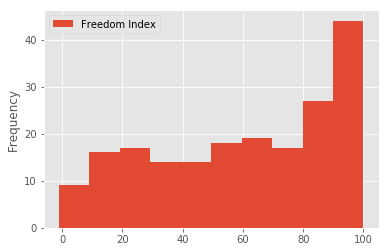

In [9]:
def freedom_index():
    """
    Read data from the Freedom Index.
    """
    # TODO: Add xlrd to requirements.
    xl = pd.ExcelFile(file_path("Freedom_index.xlsx"))
    xl = xl.parse(1)
    xl.set_index("Country")
    return xl

fi = freedom_index().set_index("Country")
fi.columns = ["Freedom Index"]
fi.plot.hist(bins=10)
#print(len(fi))

## A/B Values

These values are used in the return to skill function. These values are based on each country's income distribution.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f10b23fd8d0>,
      dtype=object)

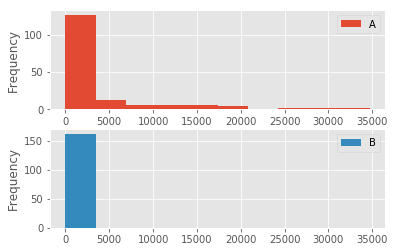

In [10]:
def ab_values():
    """
    Read generated A/B values for each country.
    """
    return pd.read_excel(file_path("A&B values for RTS.xlsx")).T

ab = ab_values()
ab.plot.hist(subplots=True, sharex=False)

### Passport Index

The [Passport Index](https://www.cato.org/human-freedom-index) comes from Arton Capital. 

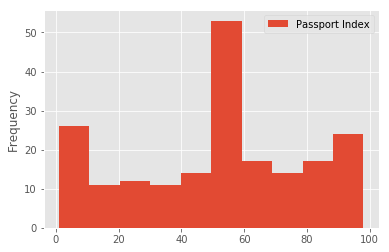

In [11]:
def passport_index():
    """
    Read data from the Passport Index.
    """
    pi = pd.read_excel(file_path("PassportIndex.xlsx"))
    pi = pi.set_index("Country")
    pi.columns = ["Passport Index"]
    return pi

pi = passport_index()
pi.plot.hist()

## Unemployment

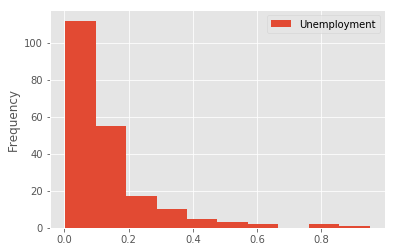

In [12]:
unemployment_data = pd.read_csv(file_path("CIA_Unemployment.csv"), index_col=0, usecols=[1, 2])
unemployment_data["Unemployment"] /= 100
unemployment_data.plot.hist()

## Population

In [13]:
# Population
population = pd.read_csv(file_path("newPOP.csv"))
population = population.set_index("Country")
population

,Population
Country,
Aruba,101669.00
Afghanistan,28803167.00
Angola,23369131.00
Albania,2913021.00
Andorra,84449.00
...,...
Kosovo,1775680.00
Yemen,23606779.00
South Africa,50979432.36


In [14]:
world.update_neighborhoods(ab)
world.update_neighborhoods(pi)
world.update_neighborhoods(unemployment_data)
world.update_neighborhoods(population)
world.update_neighborhoods(fi)

Dropped:  []
Not found in other sets:  ['VCT', 'KWT', 'NRU', 'SOM', 'BRB', 'HKG', 'SAU', 'FLK', 'JEY', 'IOT', 'ATF', 'GIB', 'PCN', 'MCO', 'ABW', 'SMR', 'AIA', 'KHM', 'QAT', 'OMN', 'BRN', 'PSE', 'SXM', 'GUM', 'MHL', 'MYT', 'VIR', 'NFK', 'NZL', 'MAC', 'ESH', 'CCK', 'PYF', 'AND', 'AFG', 'MTQ', 'UMI', 'ARE', 'VGB', 'NCL', 'LBY', 'KNA', 'SGP', 'ANT', 'FRO', 'ATG', 'NIU', 'PRI', 'CYM', 'CUW', 'BHS', 'DMA', 'MNP', 'TCA', 'GUF', 'LIE', 'GRD', 'BES', 'ZWE', 'GRL', 'REU', 'GGY', 'ATA', 'GLP', 'ASM', 'BHR', 'BVT', 'MLT', 'MSR', 'SPM', 'TWN', 'SGS', 'CUB', 'VAT', 'SHN', 'IMN', 'TKL', 'PLW', 'BMU', 'ERI', 'WLF', 'CXR', 'HMD', 'SJM', 'GNQ', 'PRK', 'COK']
Dropped:  ['KHM', 'DMA', 'PLW', 'MAC', 'VCT', 'SGP', 'PSE', 'HKG', 'BHS', 'ZWE', 'KNA', 'BRB', 'ATG', 'GRD', 'AND', 'LIE', 'MLT', 'MCO', 'SMR', 'VAT', 'QAT', 'MHL', 'OMN', 'BHR', 'TWN', 'BRN', 'NZL', 'KWT', 'ARE', 'CUB', 'NRU', 'SAU', 'GNQ', 'ERI', 'LBY', 'AFG', 'PRK', 'SOM']
Not found in other sets:  ['WEGZ']
Dropped:  ['KHM', 'QAT', 'GGY', 'JEY', 

,Freedom Index
ALB,68
ARG,82
ARM,45
AUS,98
AUT,95
...,...
VNM,20
VUT,80
YEM,14
ZAF,78


## Shared Language

Agents are assigned proficiency in languages spoken in their origin country. Mov-
ing to a country with entirely new languages presents a higher migration cost.

In [16]:
lang_csv = pd.read_csv(file_path("languages.csv"), index_col=0)
# TODO: '' why?
lang_sets = [set([str(y).strip() for y in x[1] if y is not ' ']) for x in lang_csv.iterrows()]
overlap = []
for s in lang_sets:
    o = []
    for i in range(len(lang_sets)):
        o.append(len(lang_sets[i].intersection(s)) >= 1)
    overlap.append(o)
lang_data = pd.DataFrame(overlap, index=lang_csv.index, columns=lang_csv.index)
print(len(lang_data))
world.add_matrix("language", 1-lang_data)

218
Could not find:  ['ZAR', 'TMP', 'FRE', 'GAZ', 'ROM']
Could not find:  ['ZAR', 'TMP', 'FRE', 'GAZ', 'ROM']


,ALB,DZA,ARG,ARM,AUS,AUT,AZE,BGD,BLR,BEL,...,UKR,GBR,USA,URY,UZB,VUT,VEN,VNM,YEM,ZMB
ALB,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DZA,1,0,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,0,1
ARG,1,1,0,1,1,1,1,1,1,1,...,1,1,0,0,1,1,0,1,1,1
ARM,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
AUS,1,1,1,1,0,1,1,0,1,1,...,1,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VUT,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
VEN,1,1,0,1,1,1,1,1,1,1,...,1,1,0,0,1,1,0,1,1,1
VNM,1,1,1,1,0,1,1,0,1,1,...,1,0,0,1,1,1,1,0,1,1
YEM,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1


## UN Migration History

In [17]:
un_pd = pd.read_excel(
        file_path(
            "UN_MigrantStockByOriginAndDestination_2015.xlsx"
        ),
        skiprows=15
    )
un_pd = un_pd.set_index('Unnamed: 1')
un_pd = un_pd.iloc[0:275,7:250]

# TODO: Should we be using the UN numbers for this?
un_pd = un_pd.sort_index().fillna(1)
world.add_matrix("un", un_pd)

Could not find:  ['Africa', 'Asia', 'Australia and New Zealand', 'Caribbean', 'Central America', 'Central Asia', 'Channel Islands', 'Developed regions', 'Developing regions', 'Eastern Africa', 'Eastern Asia', 'Eastern Europe', 'Europe', 'Latin America and the Caribbean', 'Least developed countries', 'Less developed regions excluding least developed countries', 'Melanesia', 'Middle Africa', 'Northern Africa', 'Northern America', 'Northern Europe', 'Oceania', 'Polynesia', 'South America', 'South-Eastern Asia', 'Southern Africa', 'Southern Asia', 'Southern Europe', 'Sub-Saharan Africa', 'WORLD', 'Western Africa', 'Western Asia', 'Western Europe']
Could not find:  ['Channel Islands']


,ALB,DZA,ARG,ARM,AUS,AUT,AZE,BGD,BLR,BEL,...,UKR,GBR,USA,URY,UZB,VUT,VEN,VNM,YEM,ZMB
ALB,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2628.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
DZA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1440.0,1968.0,1.0,1.0,1.0,1.0,1.0,4257.0,1.0
ARG,66.0,104.0,1.0,561.0,275.0,1022.0,1.0,1.0,304.0,537.0,...,4408.0,943.0,5135.0,132749.0,1.0,8.0,1240.0,5.0,1.0,1.0
ARM,1.0,1.0,1.0,1.0,1.0,1.0,87675.0,1.0,328.0,1.0,...,2645.0,1.0,1.0,1.0,1061.0,1.0,1.0,1.0,1.0,1.0
AUS,3334.0,1561.0,15423.0,1371.0,1.0,20434.0,538.0,37092.0,2057.0,7849.0,...,17227.0,1289396.0,110643.0,11140.0,1625.0,1572.0,4895.0,227298.0,675.0,7121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VUT,1.0,1.0,1.0,1.0,629.0,1.0,1.0,1.0,1.0,1.0,...,1.0,108.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
VEN,19.0,95.0,9944.0,34.0,148.0,828.0,1.0,1.0,1.0,395.0,...,211.0,1803.0,11242.0,4795.0,1.0,1.0,1.0,12.0,1.0,1.0
VNM,1.0,1.0,1.0,1.0,37.0,1.0,1.0,7895.0,1.0,1.0,...,1.0,1119.0,3164.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
YEM,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,15.0,1.0,1.0


## Distance

The great circle distance between the average latitude and longitude of each country is used to determine distance between each pair of countries. A greater distance between countries corresponds to a greater cost of migration.

In [18]:
distance_frame = pd.read_csv(
    file_path("Country_List_ISO_3166_Codes_Latitude_Longitude.csv"),
    usecols=[2,4,5],
    index_col=0,
    keep_default_na=False)
locations = [(x[1][0], x[1][1]) for x in distance_frame.iterrows()]
rows = []
for i in range(len(locations)):
    row = []
    for loc in locations:
        row.append(haversine(loc, locations[i]))
    rows.append(row)
distance = pd.DataFrame(rows, distance_frame.index, distance_frame.index)
world.add_matrix("distance", distance / distance.max().max())

,ALB,DZA,ARG,ARM,AUS,AUT,AZE,BGD,BLR,BEL,...,UKR,GBR,USA,URY,UZB,VUT,VEN,VNM,YEM,ZMB
ALB,0.000000,0.105815,0.597475,0.105397,0.689426,0.044053,0.115292,0.332357,0.073126,0.082197,...,0.064645,0.108879,0.457246,0.565456,0.182473,0.789540,0.454184,0.425656,0.197579,0.315345
DZA,0.105815,0.000000,0.492523,0.202478,0.755319,0.116380,0.213293,0.425091,0.172620,0.126921,...,0.169869,0.145872,0.446199,0.459884,0.282619,0.894200,0.376379,0.519595,0.242037,0.279598
ARG,0.597475,0.492523,0.000000,0.691589,0.649479,0.592982,0.702536,0.862511,0.653588,0.576296,...,0.658957,0.571789,0.434729,0.037466,0.770946,0.612930,0.233571,0.888199,0.646693,0.471675
ARM,0.105397,0.202478,0.691589,0.000000,0.586362,0.132565,0.010958,0.227010,0.096682,0.168266,...,0.071601,0.189984,0.525474,0.656711,0.080298,0.692048,0.558385,0.320622,0.139651,0.315251
AUS,0.689426,0.755319,0.649479,0.586362,0.000000,0.718057,0.577700,0.365302,0.667166,0.749560,...,0.650064,0.764047,0.760862,0.663295,0.518109,0.185352,0.854581,0.279761,0.513529,0.524247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VUT,0.789540,0.894200,0.612930,0.692048,0.185352,0.788136,0.681178,0.472773,0.728063,0.792157,...,0.726893,0.783578,0.580062,0.644838,0.611792,0.000000,0.709326,0.378672,0.674623,0.707919
VEN,0.454184,0.376379,0.233571,0.558385,0.854581,0.427252,0.567306,0.779662,0.477835,0.395708,...,0.495347,0.380127,0.227847,0.233834,0.627211,0.709326,0.000000,0.859593,0.614850,0.543426
VNM,0.425656,0.519595,0.888199,0.320622,0.279761,0.444858,0.310443,0.094504,0.389434,0.472119,...,0.375285,0.484589,0.676896,0.869275,0.244157,0.378672,0.859593,0.000000,0.309503,0.451014
YEM,0.197579,0.242037,0.646693,0.139651,0.513529,0.240108,0.141687,0.224692,0.228628,0.279139,...,0.202439,0.305260,0.653644,0.609393,0.163761,0.674623,0.614850,0.309503,0.000000,0.193773


Calculate "RTS".

In [19]:
world.update_neighborhoods(pd.Series(world.data["A"] * e ** (world.data["B"] * skill.value)), "rts")

Dropped:  []
Not found in other sets:  []


ALB     7315.929956
ARG    27726.158370
ARM     6613.056498
AUS    96290.546610
AUT    80916.261375
           ...     
VNM     4215.430012
VUT     5639.389418
YEM     1907.912265
ZAF    13511.785337
ZMB     2960.633924
Name: rts, Length: 134, dtype: float64

## Freedom Index difference 
\begin{equation}
\frac{FI_D-FI_O}{100}
\end{equation}

In [22]:
rows=[]
for i in range(len(world.data["Freedom Index"])):
    row = []
    for freedom_index in world.data["Freedom Index"]:
        diff=(freedom_index-(world.data["Freedom Index"][i]))/100.0
        row.append(diff)
    rows.append(row)
fi_diff = (pd.DataFrame(rows, world.data["Freedom Index"].index, world.data["Freedom Index"].index))
print(fi_diff)

      ALB   ARG   ARM   AUS   AUT   AZE   BEL   BFA   BGD   BGR  ...    UKR  \
ALB  0.00  0.14 -0.23  0.30  0.27 -0.54  0.27 -0.05 -0.21  0.12  ...  -0.07   
ARG -0.14  0.00 -0.37  0.16  0.13 -0.68  0.13 -0.19 -0.35 -0.02  ...  -0.21   
ARM  0.23  0.37  0.00  0.53  0.50 -0.31  0.50  0.18  0.02  0.35  ...   0.16   
AUS -0.30 -0.16 -0.53  0.00 -0.03 -0.84 -0.03 -0.35 -0.51 -0.18  ...  -0.37   
AUT -0.27 -0.13 -0.50  0.03  0.00 -0.81  0.00 -0.32 -0.48 -0.15  ...  -0.34   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
VNM  0.48  0.62  0.25  0.78  0.75 -0.06  0.75  0.43  0.27  0.60  ...   0.41   
VUT -0.12  0.02 -0.35  0.18  0.15 -0.66  0.15 -0.17 -0.33  0.00  ...  -0.19   
YEM  0.54  0.68  0.31  0.84  0.81  0.00  0.81  0.49  0.33  0.66  ...   0.47   
ZAF -0.10  0.04 -0.33  0.20  0.17 -0.64  0.17 -0.15 -0.31  0.02  ...  -0.17   
ZMB  0.12  0.26 -0.11  0.42  0.39 -0.42  0.39  0.07 -0.09  0.24  ...   0.05   

      URY   USA   UZB   VEN   VNM   VUT   YEM   ZAF

## Political barriers
$$  PB = \delta_1 \frac{PIR_{D}}{100} +  \delta_2 (1-\frac{(FI_D-FI_O)}{100}) $$

In [24]:
delta1=.5
delta2=.25
political_barriers=delta1*world.data["Passport Index"]/100.0 + delta2*(1 - fi_diff)
print(political_barriers)


        ALB     ARG     ARM     AUS     AUT     AZE     BEL     BFA     BGD  \
ALB  0.5350  0.4900  0.4425  0.5750  0.4325  0.7950  0.4325  0.5875  0.3775   
ARG  0.5700  0.5250  0.4775  0.6100  0.4675  0.8300  0.4675  0.6225  0.4125   
ARM  0.4775  0.4325  0.3850  0.5175  0.3750  0.7375  0.3750  0.5300  0.3200   
AUS  0.6100  0.5650  0.5175  0.6500  0.5075  0.8700  0.5075  0.6625  0.4525   
AUT  0.6025  0.5575  0.5100  0.6425  0.5000  0.8625  0.5000  0.6550  0.4450   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
VNM  0.4150  0.3700  0.3225  0.4550  0.3125  0.6750  0.3125  0.4675  0.2575   
VUT  0.5650  0.5200  0.4725  0.6050  0.4625  0.8250  0.4625  0.6175  0.4075   
YEM  0.4000  0.3550  0.3075  0.4400  0.2975  0.6600  0.2975  0.4525  0.2425   
ZAF  0.5600  0.5150  0.4675  0.6000  0.4575  0.8200  0.4575  0.6125  0.4025   
ZMB  0.5050  0.4600  0.4125  0.5450  0.4025  0.7650  0.4025  0.5575  0.3475   

        BGR   ...       UKR     URY     USA     UZB

In [25]:
world.add_matrix("Political Barriers", political_barriers)

,ALB,ARG,ARM,AUS,AUT,AZE,BEL,BFA,BGD,BGR,...,UKR,URY,USA,UZB,VEN,VNM,VUT,YEM,ZAF,ZMB
ALB,0.5350,0.4900,0.4425,0.5750,0.4325,0.7950,0.4325,0.5875,0.3775,0.4700,...,0.4975,0.4650,0.5825,0.8625,0.6600,0.7750,0.3800,0.8300,0.5250,0.4100
ARG,0.5700,0.5250,0.4775,0.6100,0.4675,0.8300,0.4675,0.6225,0.4125,0.5050,...,0.5325,0.5000,0.6175,0.8975,0.6950,0.8100,0.4150,0.8650,0.5600,0.4450
ARM,0.4775,0.4325,0.3850,0.5175,0.3750,0.7375,0.3750,0.5300,0.3200,0.4125,...,0.4400,0.4075,0.5250,0.8050,0.6025,0.7175,0.3225,0.7725,0.4675,0.3525
AUS,0.6100,0.5650,0.5175,0.6500,0.5075,0.8700,0.5075,0.6625,0.4525,0.5450,...,0.5725,0.5400,0.6575,0.9375,0.7350,0.8500,0.4550,0.9050,0.6000,0.4850
AUT,0.6025,0.5575,0.5100,0.6425,0.5000,0.8625,0.5000,0.6550,0.4450,0.5375,...,0.5650,0.5325,0.6500,0.9300,0.7275,0.8425,0.4475,0.8975,0.5925,0.4775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,0.4150,0.3700,0.3225,0.4550,0.3125,0.6750,0.3125,0.4675,0.2575,0.3500,...,0.3775,0.3450,0.4625,0.7425,0.5400,0.6550,0.2600,0.7100,0.4050,0.2900
VUT,0.5650,0.5200,0.4725,0.6050,0.4625,0.8250,0.4625,0.6175,0.4075,0.5000,...,0.5275,0.4950,0.6125,0.8925,0.6900,0.8050,0.4100,0.8600,0.5550,0.4400
YEM,0.4000,0.3550,0.3075,0.4400,0.2975,0.6600,0.2975,0.4525,0.2425,0.3350,...,0.3625,0.3300,0.4475,0.7275,0.5250,0.6400,0.2450,0.6950,0.3900,0.2750
ZAF,0.5600,0.5150,0.4675,0.6000,0.4575,0.8200,0.4575,0.6125,0.4025,0.4950,...,0.5225,0.4900,0.6075,0.8875,0.6850,0.8000,0.4050,0.8550,0.5500,0.4350


## Migration History 
\begin{equation} 
MH_{O\rightarrow D}\ = \gamma_1 (1-OM_{O\rightarrow D})\ + \gamma_2 (1-EE_{O\rightarrow D}) 
\end{equation}

\begin{equation} OM_{O\rightarrow D}\ = \frac {\text {migrants from origin in destination}} {\text {population of origin}} \end{equation}

\begin{equation} EE_{O\leftrightarrow D}\ = \frac {\text{migrants from origin in destination}} {\text {population of destination.}} \end{equation}

In [31]:
gamma1=.5
gamma2=.5
OM=world.matrices['un'].sort_index(axis=1).sort_index(axis=0)/world.data['Population']
#transpose UN matrix for this calculation so that we are dividing by population of destination 
EE=world.matrices['un'].T.sort_index(axis=1).sort_index(axis=0)/world.data['Population']
EE=EE.T
MH=gamma1*(1-OM)+gamma2*(1-EE)
print(MH)


          ALB       ARG       ARM       AUS       AUT       AZE       BEL  \
ALB  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
ARG  0.999988  1.000000  0.999896  0.999990  0.999927  1.000000  0.999969   
ARM  1.000000  1.000000  1.000000  1.000000  1.000000  0.979923  1.000000   
AUS  0.999352  0.999463  0.999731  1.000000  0.998315  0.999958  0.999462   
AUT  0.999272  0.999890  0.999287  0.999795  1.000000  0.999876  0.999728   
..        ...       ...       ...       ...       ...       ...       ...   
VNM  1.000000  1.000000  1.000000  0.999999  1.000000  1.000000  1.000000   
VUT  0.999998  0.999998  0.999998  0.998655  0.999998  0.999998  0.999998   
YEM  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
ZAF  0.999970  0.999947  1.000000  0.999761  0.999617  1.000000  0.999524   
ZMB  1.000000  1.000000  1.000000  0.999972  1.000000  1.000000  1.000000   

          BFA       BGD       BGR    ...          UKR       URY       USA  

In [32]:
world.add_matrix("Migration History", MH)

,ALB,ARG,ARM,AUS,AUT,AZE,BEL,BFA,BGD,BGR,...,UKR,URY,USA,UZB,VEN,VNM,VUT,YEM,ZAF,ZMB
ALB,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.999545,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000
ARG,0.999988,1.000000,0.999896,0.999990,0.999927,1.000000,0.999969,1.000000,1.000000,0.999976,...,0.999898,0.978720,0.999929,1.000000,0.999964,1.000000,0.999983,1.000000,0.999997,1.000000
ARM,1.000000,1.000000,1.000000,1.000000,1.000000,0.979923,1.000000,1.000000,1.000000,1.000000,...,0.999512,1.000000,1.000000,0.999797,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000
AUS,0.999352,0.999463,0.999731,1.000000,0.998315,0.999958,0.999462,0.999999,0.999036,0.999640,...,0.999421,0.998097,0.997310,0.999935,0.999805,0.993534,0.996638,0.999970,0.994040,0.999581
AUT,0.999272,0.999890,0.999287,0.999795,1.000000,0.999876,0.999728,0.999989,0.999827,0.997996,...,0.999418,0.999941,0.999321,0.999942,0.999930,0.999781,0.999985,0.999992,0.999806,0.999989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,1.000000,1.000000,1.000000,0.999999,1.000000,1.000000,1.000000,1.000000,0.999929,1.000000,...,1.000000,1.000000,0.999977,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000
VUT,0.999998,0.999998,0.999998,0.998655,0.999998,0.999998,0.999998,0.999998,0.999998,0.999998,...,0.999998,0.999998,0.999998,0.999998,0.999998,0.999998,0.999996,0.999998,0.999998,0.999998
YEM,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000
ZAF,0.999970,0.999947,1.000000,0.999761,0.999617,1.000000,0.999524,1.000000,0.999962,0.999673,...,0.999915,0.999982,0.999793,1.000000,0.999992,0.999997,0.999998,0.999997,1.000000,0.997224


\begin{equation}
C = { \alpha_1 \frac{D_{O\leftrightarrow D}} {D_{Max}} + \alpha_2 MH_{O\rightarrow D}  + \alpha_3 L_{O\leftrightarrow D} + \alpha_4 PB}
\end{equation}

In [38]:
# Cost
alpha1=.35
alpha2=.35
alpha3=.15
alpha4=.15
world.add_matrix(
    "cost",
    (alpha1*world.matrices["distance"] +
     alpha2*world.matrices["Migration History"] +
     alpha3*world.matrices["language"] +
     alpha4*world.matrices["Political Barriers"])
)


,ALB,ARG,ARM,AUS,AUT,AZE,BEL,BFA,BGD,BGR,...,UKR,URY,USA,UZB,VEN,VNM,VUT,YEM,ZAF,ZMB
ALB,0.43025,0.782616,0.603264,0.827549,0.580293,0.659602,0.593644,0.654164,0.67295,0.578703,...,0.597251,0.76766,0.747252,0.69324,0.757964,0.76523,0.833338,0.693653,0.715052,0.671871
ARG,0.794612,0.42875,0.813644,0.818814,0.777643,0.870387,0.771818,0.739828,0.863754,0.793061,...,0.810475,0.430665,0.594755,0.904456,0.535987,0.93237,0.77677,0.856093,0.725473,0.731836
ARM,0.608514,0.806931,0.40775,0.782852,0.602648,0.607433,0.615143,0.675133,0.627453,0.591504,...,0.590889,0.790974,0.762666,0.648783,0.78581,0.719843,0.790591,0.664753,0.709556,0.663213
AUS,0.832572,0.81188,0.782758,0.4475,0.826855,0.83268,0.838283,0.863287,0.545393,0.816376,...,0.813195,0.812487,0.713985,0.82194,0.909285,0.573153,0.631947,0.815475,0.61666,0.75609
AUT,0.605539,0.79113,0.622648,0.847623,0.425,0.678561,0.588587,0.669516,0.690701,0.597975,...,0.608908,0.777273,0.742137,0.709936,0.758639,0.781999,0.842967,0.71866,0.738406,0.696257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,0.71123,0.86637,0.660593,0.516166,0.702575,0.709905,0.712117,0.770686,0.421677,0.693793,...,0.687975,0.855996,0.656281,0.69683,0.881857,0.44825,0.671535,0.714826,0.587602,0.701355
VUT,0.861088,0.792525,0.813091,0.655152,0.845222,0.862162,0.846629,0.921115,0.726595,0.843138,...,0.833537,0.799942,0.794896,0.848002,0.851763,0.753285,0.411499,0.865117,0.821511,0.813771
YEM,0.629153,0.779593,0.595003,0.745735,0.628663,0.648591,0.642324,0.662095,0.615017,0.616808,...,0.625229,0.762787,0.7959,0.666441,0.793947,0.704326,0.772867,0.45425,0.65521,0.60907
ZAF,0.720291,0.718705,0.709556,0.618662,0.71809,0.764633,0.72745,0.687029,0.571085,0.714147,...,0.730648,0.703688,0.69539,0.787101,0.78527,0.646851,0.799011,0.724959,0.4325,0.593556


In [39]:
gos.map_plot("Costs (SYR)", "Reds", world.matrices["cost"]["SYR"], matplotlib.colors.Normalize)

AttributeError: module 'gos' has no attribute 'map_plot'

In [ ]:
gos.map_plot("Costs (FRA)", "Reds", world.matrices["cost"]["FRA"], matplotlib.colors.Normalize)

In [ ]:
world.update_neighborhoods((1 - world.data["Unemployment"]) * world.data["rts"], "wages")

In [ ]:
gos.map_plot("Wages", "Greens", world.data["wages"], matplotlib.colors.Normalize)

In [ ]:
beta = 50000

world.add_matrix("migration", (pd.DataFrame(
    np.array(
        [[x] * len(world.data) for x in world.data["wages"].values]
    ) - np.array(
        [list(world.data["wages"].values)] * len(world.data)
    ),
    world.data.index,
    world.data.index
    ) - beta * world.matrices["cost"]).clip_lower(0))
world.matrices["migration"] = world.matrices["migration"] / (world.matrices["migration"].sum() + 1)
world.matrices["migration"] = world.matrices["migration"] / world.matrices["migration"].sum(axis=1).max()

# TODO: Why does this require being transposed?
world.matrices["migration"] = (0.15 * world.matrices["migration"].transpose() * world.data["Population"]).transpose()

world.matrices["migration"]

In [ ]:
gos.map_plot(
    "Immigration Estimations (x={})".format(skill.value),
    'Greens',
    world.matrices["migration"].sum(axis=1)+1,
    matplotlib.colors.LogNorm)

In [ ]:
gos.map_plot(
    "Estimated Number of Emigrants (x={})".format(skill.value),
    'Reds',
    world.matrices["migration"].sum(),
    matplotlib.colors.Normalize
)

In [ ]:
gos.map_plot(
    "Net Migration (x={})".format(skill.value),
    'coolwarm',
    world.matrices["migration"].sum(axis=1) - world.matrices["migration"].sum(),
    gos.MidPointNorm, sides=2)

In [ ]:
import numpy as np
from numpy import ma
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cbook
from matplotlib.colors import Normalize
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize, LogNorm

COLOR1 = '#333333'
COLOR2 = '#000000'

def plot_lines(matrix):
    fix, ax = plt.subplots(figsize=(24, 12))
    m = Basemap(resolution='l',
               projection='robin',
               lon_0=0)

    m.drawmapboundary(fill_color=COLOR1)
    m.fillcontinents(color=COLOR2, lake_color=COLOR1)
    d = distance_frame[distance_frame.index.isin(world.data.index)]
    for _, x in d.iterrows():
        for _, y in d.iterrows():
            if matrix[x.name][y.name] > 0.1:
                m.drawgreatcircle(
                    x["Longitude (average)"],
                    x["Latitude (average)"],
                    y["Longitude (average)"],
                    y["Latitude (average)"],
                    linewidth=2,
                    color='#00FF00{:02X}'.format((int(25 + 100 * matrix[x.name][y.name] / matrix.max().max())))
                )
    #plt.savefig('linesfig.pdf', format='pdf', dpi=1000, transparent=True)
    return plt

plot_lines(world.matrices["migration"])